In [1]:
import PyQt5
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import sqlite3
import pandas as pd

In [2]:
style.use('fivethirtyeight')
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)

In [3]:
def animate(i):
    conn = sqlite3.connect('twitter.db')
    c = conn.cursor()
    df = pd.read_sql("SELECT * FROM sentiment WHERE tweet LIKE '%NSE%' ORDER BY unix DESC LIMIT 1000", conn)
    df.sort_values('unix', inplace=True)
    df['sentiment_smoothed'] = df['sentiment'].rolling(int(len(df)/5)).mean()
    df.dropna(inplace=True)

    X = df.unix.values[-100:]
    Y = df.sentiment_smoothed.values[-100:]
    
    ax1.clear()
    ax1.plot(X,Y)

In [4]:
ani=animation.FuncAnimation(fig, animate, interval=100)
plt.show()


In [10]:
print(X)

NameError: name 'X' is not defined

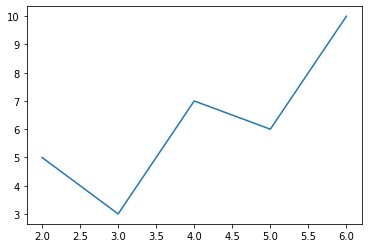

In [5]:
import matplotlib.pyplot as plt
a=2
import time
x=[2,3,4,5,6]
y=[5,3,7,6,10]
for i in range(1,a,1):
    plt.plot(x,y)
    a=a+1